# 서울시 구별 CCTV 현황 분석하기

### 작성 : [PinkWink](http://pinkwink.kr) 

* 서울시 각 구별 CCTV수를 파악하고, 인구대비 CCTV 비율을 파악해서 순위 비교
* 인구대비 CCTV의 평균치를 확인하고 그로부터 CCTV가 과하게 부족한 구를 확인
* Jupyter Notebook 사용환경을 익히고 Python 기본 문법을 확인
* Pandas와 Matplotlib의 기본적 사용법을 확인
* 단순한 그래프 표현에서 한 단계 더 나아가 경향을 확인하고 시각화하는 기초 확인

In [1]:
 # 파일 마운트를 해야하는데 귀찮으시면 작업 없이 그냥 리뷰하시면 됩니다!

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/My Drive/01.CCTV_in_Seoul.csv')
df.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [5]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기관명        25 non-null     object
 1   소계         25 non-null     int64 
 2   2013년도 이전  25 non-null     int64 
 3   2014년      25 non-null     int64 
 4   2015년      25 non-null     int64 
 5   2016년      25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354
8,노원구,1265,542,57,451,516
9,도봉구,485,238,159,42,386


널 갑과 데이터 인포를 확인 하는 방법


In [6]:
df.columns = ['구', '합','~2013','2014','2015','2016']
df

,구,합,~2013,2014,2015,2016
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354
8,노원구,1265,542,57,451,516
9,도봉구,485,238,159,42,386


데이터를 더욱 편하게 보기위해서 새 컬럼명을 덮어썼다.

In [7]:
df2013=df.loc[:, ['구', '~2013']]
df2014=df.loc[:, ['구', '2014']]
df2015=df.loc[:, ['구', '2015']]
df2016=df.loc[:, ['구', '2016']]
# 각 해년도의 카메라 수가많은 정보를 보기 편하기위해 구와 년도 로 컬럼 추출을 하였음.



In [8]:
df13sort=df2013.sort_values(by='~2013', ascending=False)
df14sort=df2014.sort_values(by='2014', ascending=False)
df15sort=df2015.sort_values(by='2015', ascending=False)
df16sort=df2016.sort_values(by='2016', ascending=False)

In [9]:
pd.concat([df13sort, df14sort, df15sort, df16sort], axis=1) #각각 년도의 카메라 설치가 되어있는 수가 많은 구의 대수와 설치대수

,구,~2013,구,2014,구,2015,구,2016
0,강남구,1292,강남구,430,강남구,584,강남구,932
1,강동구,379,강동구,99,강동구,155,강동구,377
2,강북구,369,강북구,120,강북구,138,강북구,204
3,강서구,388,강서구,258,강서구,184,강서구,81
4,관악구,846,관악구,260,관악구,390,관악구,613
5,광진구,573,광진구,78,광진구,53,광진구,174
6,구로구,1142,구로구,173,구로구,246,구로구,323
7,금천구,674,금천구,51,금천구,269,금천구,354
8,노원구,542,노원구,57,노원구,451,노원구,516
9,도봉구,238,도봉구,159,도봉구,42,도봉구,386


In [10]:
from google.colab import drive # 서울시 인구현황 마운트준비
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
sp = pd.read_excel("/content/01. population_in_Seoul.xls",
    header = 2,
    usecols = 'B, D, G, J, N')
sp.head() 
#서울시 인구 현황 엑섹파일 확인 하기
#서울시 인구 저자 처럼 자료 헤더 2개 날리고 데이터값 받기.
#파일 마운트

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [12]:
sp.rename(columns={sp.columns[0] : '구', 
                   sp.columns[1] : '인구수', 
                   sp.columns[2] : '한국인', 
                   sp.columns[3] : '외국인', 
                   sp.columns[4] : '고령자'}, inplace=True)
sp.head()

#sp 서울 인구 데이터에 구별, 인구수 한국인 외국인 65세 이상 고령자를 편하게 보기위해 컬럼값을 교체하였다.
#데이터 머지할때 구 기준을 잡을것이라 구별을 구로 맞춰준다

,구,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [13]:
sp['구'].unique() #unique 유일값 찾기, 구별항목 보기

array(['합계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [14]:
sp['외국인비율'] = sp['외국인'] / sp['인구수'] * 100
sp['고령자비율'] = sp['고령자'] / sp['인구수'] * 100
sp.head() #인구수(한국인외국인고령자) 와 비율은 100분위로 값 출력

,구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10197604.0,9926968.0,270636.0,1321458.0,2.653918,12.958515
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689


In [15]:
sp.sort_values('인구수', ascending=False) #인구수 내림차순 인구수가 가장 많은 곳순으로보기

,구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10197604.0,9926968.0,270636.0,1321458.0,2.653918,12.958515
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
15,양천구,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
8,성북구,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062
25,강동구,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638


In [16]:
cctvpeople = pd.merge(df, sp, on='구')
cctvpeople
#df cctv 데이터와 sp 데이터를 합산해서 출력 정렬점 구

,구,합,~2013,2014,2015,2016,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
5,광진구,707,573,78,53,174,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
6,구로구,1561,1142,173,246,323,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
7,금천구,1015,674,51,269,354,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
8,노원구,1265,542,57,451,516,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
9,도봉구,485,238,159,42,386,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507


In [17]:
cctvpeople.sort_values(by='합', ascending=False)
cctvpeople.head(1) # 현재 가장 많이 cctv가 설치되어 있는 구

,구,합,~2013,2014,2015,2016,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,570500.0,565550.0,4950.0,63167.0,0.86766,11.072217


In [18]:
cctvpeople.sort_values(by='인구수', ascending=False) ##################### # 현재 인구수가 가장많이 있는 구

#########부족한곳

,구,합,~2013,2014,2015,2016,인구수,한국인,외국인,고령자,외국인비율,고령자비율
17,송파구,618,529,21,68,463,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
3,강서구,884,388,258,184,81,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
0,강남구,2780,1292,430,584,932,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
8,노원구,1265,542,57,451,516,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
4,관악구,1496,846,260,390,613,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
21,은평구,1873,1138,224,278,468,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
18,양천구,2034,1843,142,30,467,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
16,성북구,1464,1009,78,360,204,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062
1,강동구,773,379,99,155,377,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
14,서초구,1930,1406,157,336,398,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308


In [19]:
#import matplotlib.pyplot as plt
import numpy as np
#그래프를 그리기 위함 matplotlib 참고

In [20]:
# 표에서 한글 꺠짐 현상이 있어서 한글 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [21]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 
#matolotlib의 폰트를 nanum 폰트로 재지정

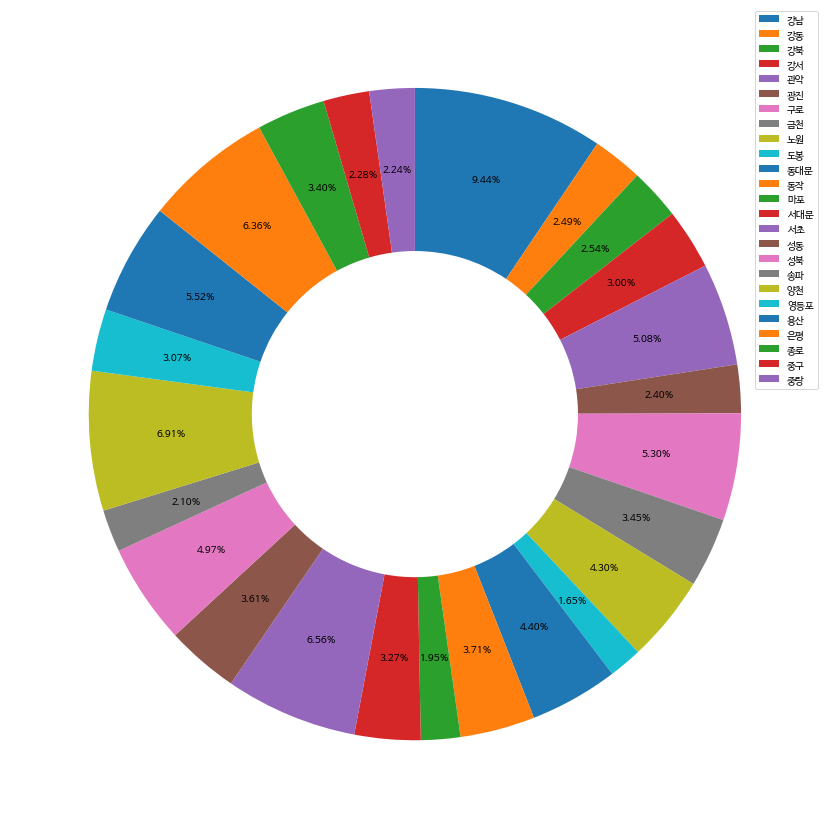

In [22]:

## 데이터 준비
labels=['강남','강동','강북','강서','관악','광진','구로','금천','노원','도봉','동대문','동작','마포','서대문',
'서초','성동','성북','송파','양천','영등포','용산','은평','종로','중구','중랑'] ## 라벨
title= '서울시 구의 설치된 CCTV 분포도'
data =[2780,733,748,884,1496,707,1561,1015,1265,485,1294,1091,574,962,1930,1062,1464,618,2034,904,1624,1873,
1002,670,660]
 
fig = plt.figure(figsize=(15,15)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(data, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       wedgeprops=dict(width=0.5) ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       )
 
total = np.sum(data) ## 빈도수 총합
 
sum_pct = 0 ## 백분율 초기값
for i,l in enumerate(labels):
    ang1, ang2 = pie[0][i].theta1, pie[0][i].theta2 ## 각1, 각2
    r = pie[0][i].r ## 원의 반지름
    
    x = ((r+0.5)/2)*np.cos(np.pi/180*((ang1+ang2)/2)) ## 정중앙 x좌표
    y = ((r+0.5)/2)*np.sin(np.pi/180*((ang1+ang2)/2)) ## 정중앙 y좌표
    
    if i < len(labels) - 1:
        sum_pct += float(f'{data[i]/total*100:.2f}') ## 백분율을 누적한다.
        ax.text(x,y,f'{data[i]/total*100:.2f}%',ha='center',va='center') ## 백분율 텍스트 표시
    else: ## 총합을 100으로 맞추기위해 마지막 백분율은 100에서 백분율 누적값을 빼준다.
        ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center') 
 
plt.legend(pie[0],labels) ## 범례 표시
plt.show()

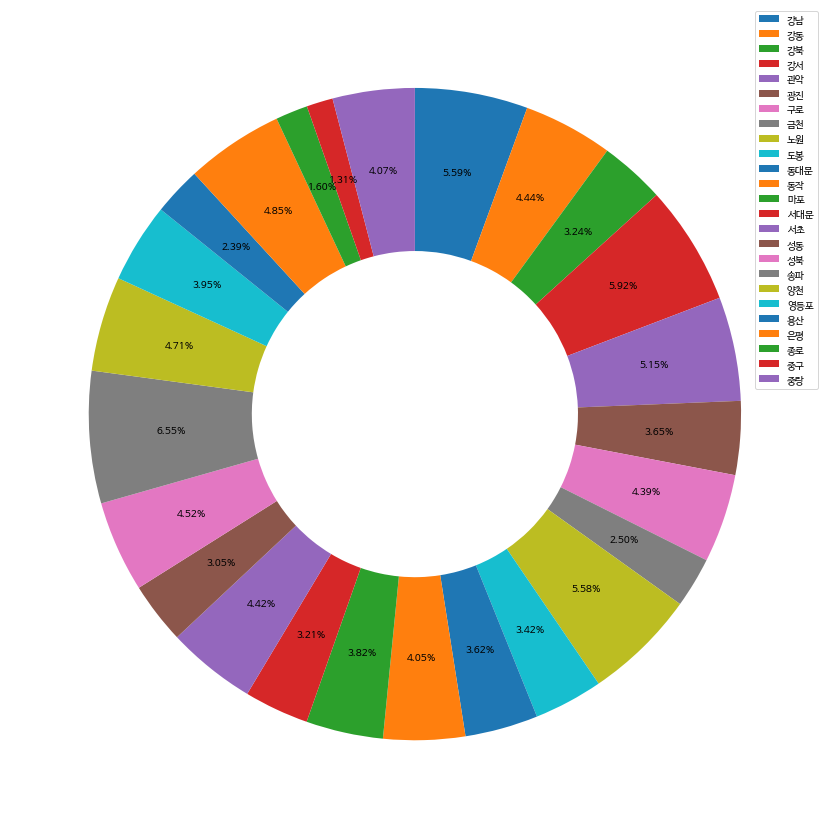

In [23]:

## 데이터 준비
# 서울시 구별 데이터 이며, CCTV 내림차순 데이터의 값을 입력하기때문에 라벨은 그대로 두고 
# 인구비율 값을 라벨 순서값에 입력해서 사용했음.
labels=['강남','강동','강북','강서','관악','광진','구로','금천','노원','도봉','동대문','동작','마포','서대문',
'서초','성동','성북','송파','양천','영등포','용산','은평','종로','중구','중랑'] ## 라벨
title= '서울시 구의 설치된 CCTV 분포도'
data =[570500,453233,330192,603772,525515,372164,447874,255082,569384,348646,369496,412520,389649,327163,
450310,311244,461260,667483,479978,402985,244203,494388,162820,133240,414503]
 
fig = plt.figure(figsize=(15,15)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(data, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       wedgeprops=dict(width=0.5) ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       )
 
total = np.sum(data) ## 빈도수 총합
 
sum_pct = 0 ## 백분율 초기값
for i,l in enumerate(labels):
    ang1, ang2 = pie[0][i].theta1, pie[0][i].theta2 ## 각1, 각2
    r = pie[0][i].r ## 원의 반지름
    
    x = ((r+0.5)/2)*np.cos(np.pi/180*((ang1+ang2)/2)) ## 정중앙 x좌표
    y = ((r+0.5)/2)*np.sin(np.pi/180*((ang1+ang2)/2)) ## 정중앙 y좌표
    
    if i < len(labels) - 1:
        sum_pct += float(f'{data[i]/total*100:.2f}') ## 백분율을 누적한다.
        ax.text(x,y,f'{data[i]/total*100:.2f}%',ha='center',va='center') ## 백분율 텍스트 표시
    else: ## 총합을 100으로 맞추기위해 마지막 백분율은 100에서 백분율 누적값을 빼준다.
        ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center') 
 
plt.legend(pie[0],labels) ## 범례 표시
plt.show()